# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control_cmaq.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-01-12:00:00',
  'end_time': '2019-08-02-12:00:00',
  'output_dir': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/processed/Aug_2021/0801/'},
 'model': {'cmaq_expt': {'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0801/aqm.20190801.t12z.aconc-pm25.ncf',
   'mod_type': 'cmaq',
   'radius_of_influence': 18000,
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}},
  'rrfs_25km': {'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/rrfs-cmaq/cases-1a6a7181/2019080112/dynf*.nc',
   'mod_type': 'rrfs',
   'mod_kwargs': {'mech': 'cb6r3_ae6_aq'},
   'radius_of_influence': 37500,
   'mapping': {'airnow': {'PM25': 'PM2.5', 'o3': 'OZONE'}},
   'projection': 'None',
   'plot_kwargs': {'color': 'purple', 'marker': 'x', 'linestyle': '--'}},
  'wrfchem_v4.2': {'files': '/scratch2/BMC/csd-wca/rhs/wrfchem/covidaqs/firex/run_CO

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_expt
{'files': '/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0801/aqm.20190801.t12z.aconc-pm25.ncf', 'mod_type': 'cmaq', 'radius_of_influence': 18000, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'plot_kwargs': {'color': 'magenta', 'marker': 'o', 'linestyle': '--'}}
/scratch2/BMC/csd-wca/rhs/FV3/RRFS-CMAQ/data/cmaq_expt/fv3-cmaq-gbbpex1/0801/aqm.20190801.t12z.aconc-pm25.ncf
[                                        ] | 0% Completed |  0.1s

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monet_def/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s
[########################################] | 100% Completed |  0.6s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.2s
[########################################] | 100

In [5]:
an.models

{'cmaq_expt': <driver.model at 0x7fe07c400e48>,
 'rrfs_25km': <driver.model at 0x7fe07c39b278>,
 'wrfchem_v4.2': <driver.model at 0x7fe04d94d160>}

In [6]:
#an.models['cmaq_expt'].obj
an.models['rrfs_25km'].obj
#an.models['rrfs_25km'].obj.isel(z=0).expand_dims('z',axis=1)

<xarray.Dataset>
Dimensions:        (time: 25, x: 191, y: 97, z: 64)
Coordinates:
    longitude      (y, x) float64 dask.array<chunksize=(97, 191), meta=np.ndarray>
    latitude       (y, x) float64 dask.array<chunksize=(97, 191), meta=np.ndarray>
  * time           (time) datetime64[ns] 2019-08-01T12:05:00 ... 2019-08-02T1...
    pres_pa        (time, z, y, x) float32 1.013e+05 1.013e+05 ... 37.92 37.92
    hgtmsl_m       (time, z, y, x) float32 23.07 23.06 ... 5.61e+04 5.609e+04
Dimensions without coordinates: x, y, z
Data variables: (12/202)
    aacd           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    aalj           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    aalk1j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    aalk2j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    abnz1j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    abnz2j         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    ...             ...
    vsvpo1         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    vsvpo2         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    vsvpo3         (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    xopn           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    xylmn          (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
    PM25           (time, z, y, x) float32 dask.array<chunksize=(1, 64, 97, 191), meta=np.ndarray>
Attributes: (12/16)
    hydrostatic:  non-hydrostatic
    ncnsto:       194
    ak:           [2.0000000e+01 6.4247000e+01 1.3779000e+02 2.2195800e+02 3....
    bk:           [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0....
    source:       FV3GFS
    grid:         lambert_conformal
    ...           ...
    nx:           191
    ny:           97
    lon1:         -120.7296237
    lat1:         25.11648583
    dx:           25000.0
    dy:           25000.0

In [7]:
an.models['wrfchem_v4.2'].obj
#All the info in the model class can be called here.
#print(an.models['cmaq_oper'].label)
#print(an.models['cmaq_oper'].mapping)

<xarray.Dataset>
Dimensions:        (time: 31, x: 440, y: 284, z: 50)
Coordinates:
    longitude      (y, x) float32 -122.3 -122.2 -122.1 ... -60.68 -60.52 -60.37
    latitude       (y, x) float32 21.19 21.22 21.24 21.27 ... 50.28 50.24 50.2
  * time           (time) datetime64[ns] 2019-08-01 ... 2019-08-02T06:00:00
    pres_pa        (time, z, y, x) float32 1.013e+05 1.013e+05 ... 5.584e+03
    hgtmsl_m       (time, z, y, x) float32 11.41 11.41 ... 2.032e+04 2.032e+04
Dimensions without coordinates: x, y, z
Data variables:
    o3             (time, z, y, x) float32 30.0 30.0 ... 2.677e+03 2.677e+03
    PM2_5_DRY      (time, z, y, x) float32 2.912 2.913 2.881 ... 0.01508 0.01508
    temperature_k  (time, z, y, x) float32 297.0 297.0 297.0 ... 219.7 219.7
Attributes:
    TRUELAT1:                  33.0
    TRUELAT2:                  45.0
    MOAD_CEN_LAT:              39.617638
    STAND_LON:                 -97.0
    MAP_PROJ:                  1
    CEN_LAT:                   39.617638
    CEN_LON:                   -97.77487
    proj4_srs:                 +proj=lcc +lat_1=33.0 +lat_2=45.0 +lat_0=39.61...
    mapping_tables_to_airnow:  {'OZONE': 'o3', 'PM2.5': 'PM2_5_DRY', 'PM10': ...

In [8]:
#All the info in the analysis class can also be called.
print(an.start_time)
print(an.end_time)
print(an.download_maps)

2019-08-01 12:00:00
2019-08-02 12:00:00
True


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [9]:
an.open_obs()

In [10]:
#All the info in the observation class can also be called.
an.obs['airnow'].obj

<xarray.Dataset>
Dimensions:     (time: 2163, x: 3790, y: 1)
Coordinates:
  * x           (x) int64 0 1 2 3 4 5 6 7 ... 3783 3784 3785 3786 3787 3788 3789
  * time        (time) datetime64[ns] 2019-08-01 ... 2019-08-31T00:30:00
    latitude    (y, x) float64 ...
    longitude   (y, x) float64 ...
    siteid      (y, x) object ...
Dimensions without coordinates: y
Data variables: (12/30)
    BARPR       (time, y, x) float64 ...
    BC          (time, y, x) float64 ...
    CO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO          (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2         (time, y, x) float64 nan nan nan nan nan ... nan nan nan nan nan
    NO2Y        (time, y, x) float64 ...
    ...          ...
    cmsa_name   (y, x) float64 ...
    msa_code    (y, x) float64 ...
    msa_name    (y, x) object ...
    state_name  (y, x) object ...
    epa_region  (y, x) object ...
    time_local  (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-06-07

In [11]:
#This just pairs the data
an.pair_data()

[########################################] | 100% Completed |  0.7s
[########################################] | 100% Completed |  0.8s
[########################################] | 100% Completed |  0.9s
[########################################] | 100% Completed |  1.0s
[########################################] | 100% Completed | 33.5s
[########################################] | 100% Completed | 33.6s
[########################################] | 100% Completed | 33.7s
[########################################] | 100% Completed | 33.8s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s


Reference std: 8.087630860042692
Reference std: 17.348285937161158
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed | 27.8s
[########################################] | 100%

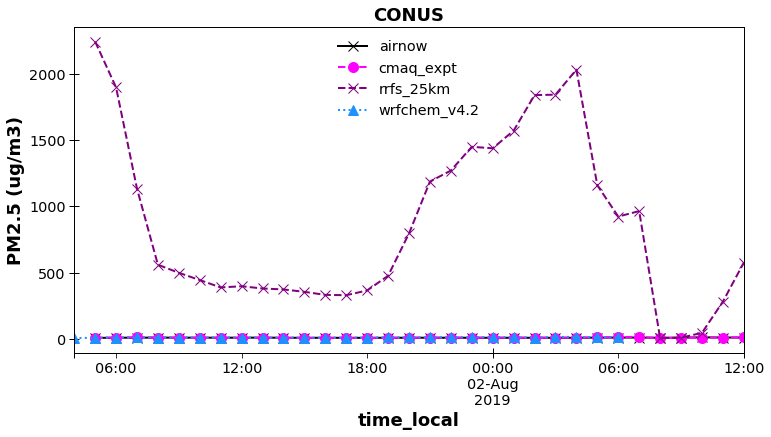

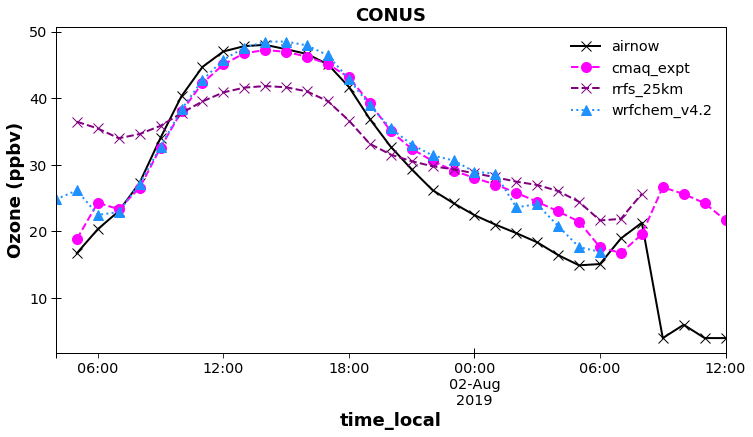

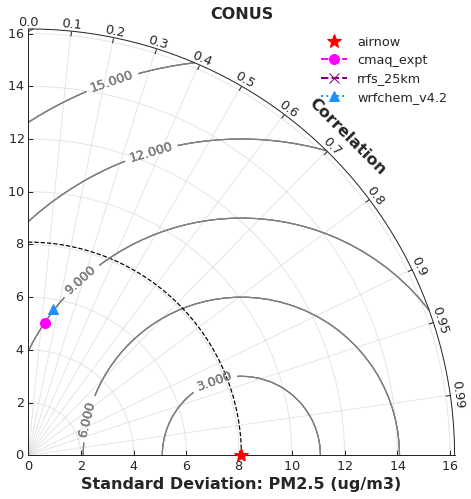

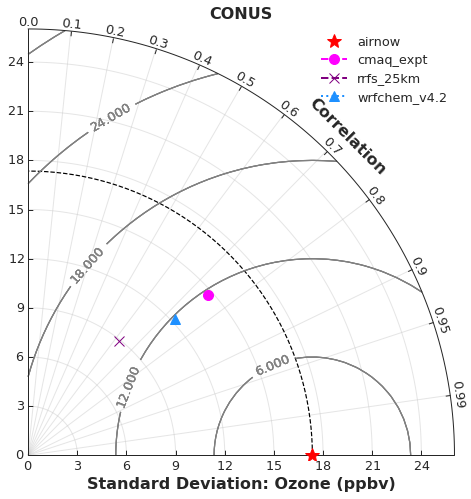

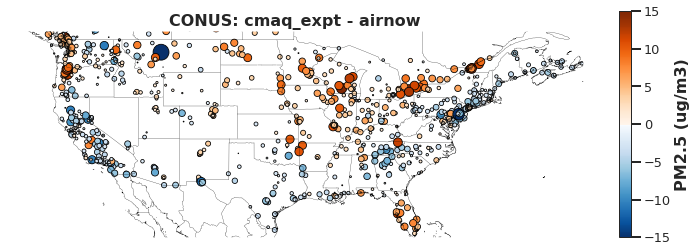

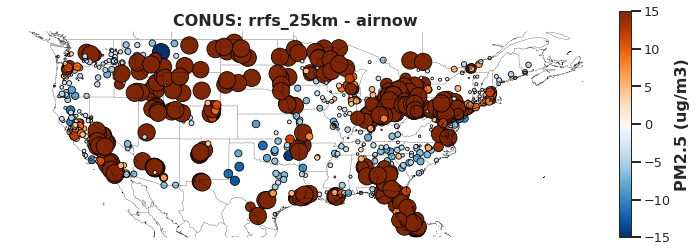

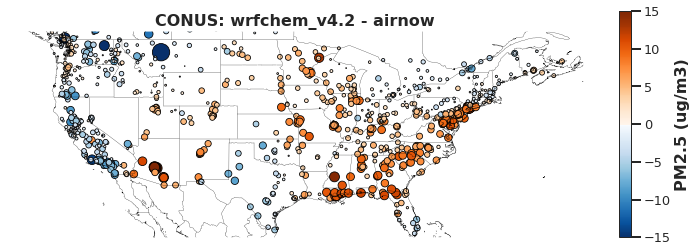

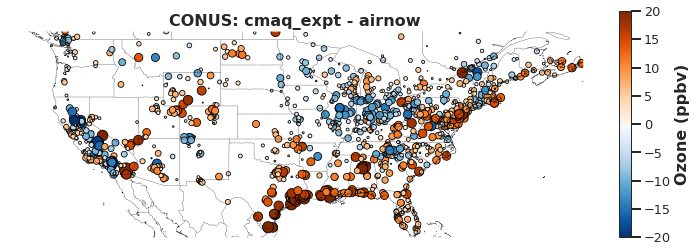

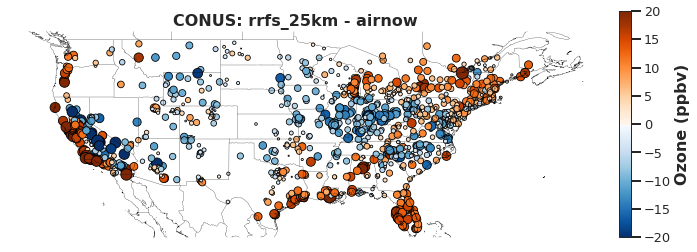

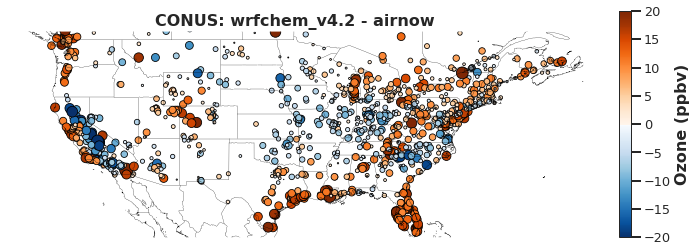

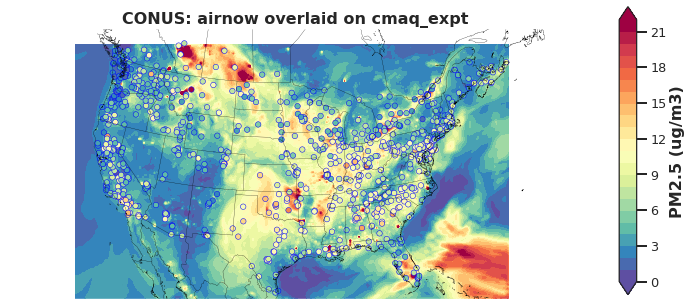

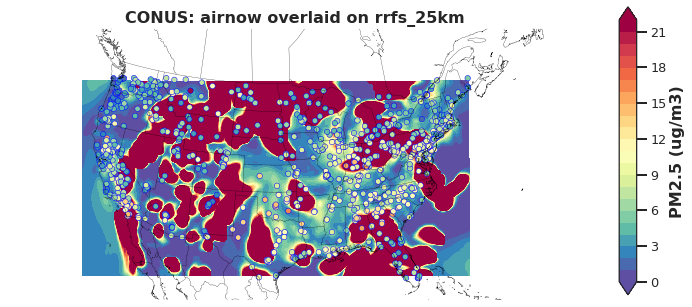

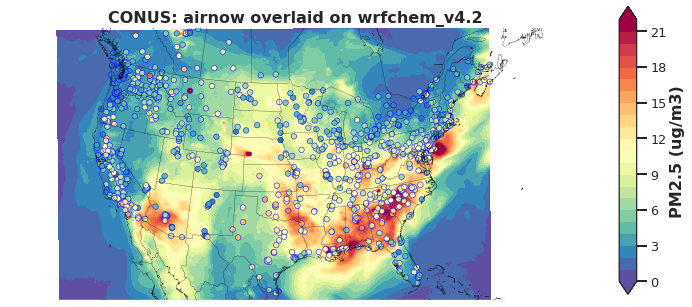

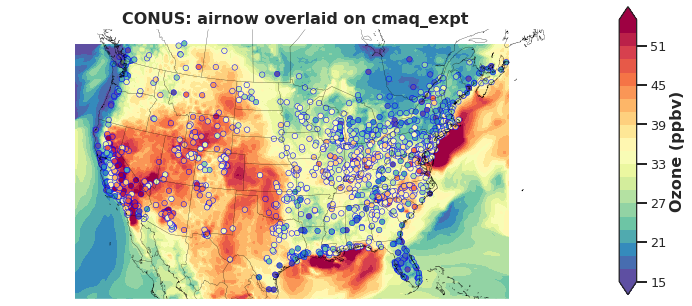

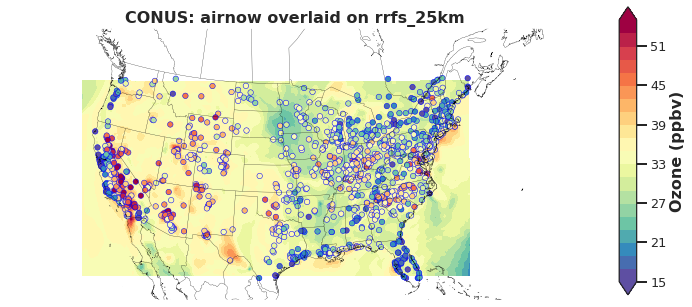

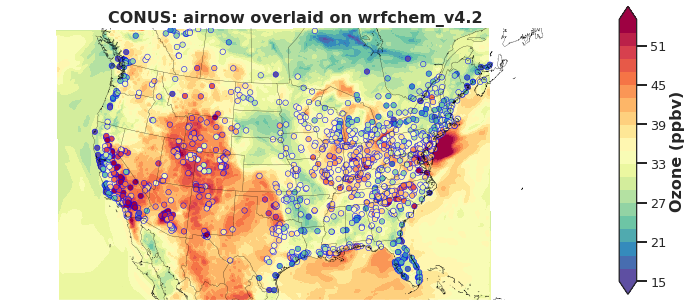

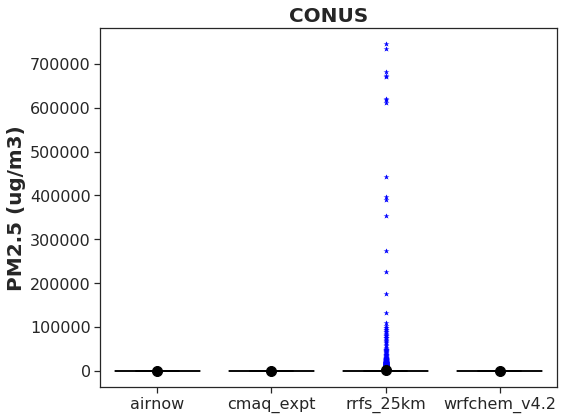

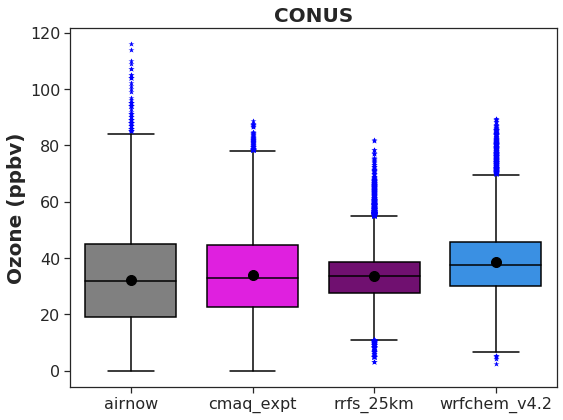

In [12]:
#And this generates all the plots.
an.plotting()

In [ ]:
an.stats()